In [131]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor


First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Description:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.

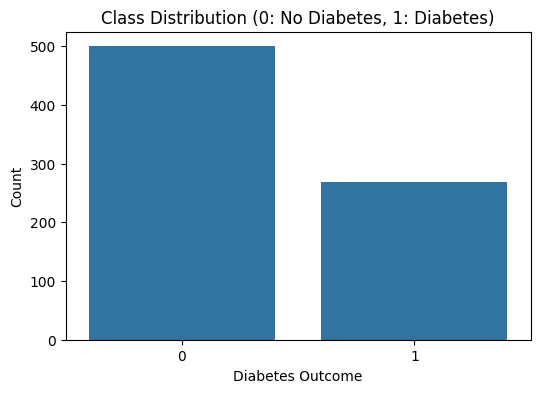

In [ ]:
# 2. قراءة البيانات
df = pd.read_csv('diabetes.csv')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('diabetes.csv')

#information before EDA
print("First 5 rows of the dataset:")
print(df.head())


print("\nDataset Description:")
print(df.describe())


zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print("\nNumber of zero entries in critical columns:")
print((df[zero_features] == 0).sum())


plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Outcome')
plt.title("Class Distribution (0: No Diabetes, 1: Diabetes)")
plt.xlabel("Diabetes Outcome")
plt.ylabel("Count")
plt.show() 

In [ ]:
#Filling Zeros using Randomforest model

df_copy = df


features_to_impute = ['Insulin', 'SkinThickness']
df_copy[features_to_impute] = df_copy[features_to_impute].replace(0, np.nan)


for feature in features_to_impute:
    df_temp = df_copy.copy()


    not_null = df_temp[df_temp[feature].notnull()]
    is_null = df_temp[df_temp[feature].isnull()]


    X_train_rf = not_null.drop(columns=[feature, 'Outcome'])
    y_train_rf = not_null[feature]
    X_pred_rf = is_null.drop(columns=[feature, 'Outcome'])


    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train_rf, y_train_rf)


    predicted_values = rf.predict(X_pred_rf)
    df_copy.loc[df_copy[feature].isnull(), feature] = predicted_values


for col in ['Glucose', 'BloodPressure', 'BMI']:
    df_copy[col] = df_copy[col].replace(0, df_copy[col].median())


X = df_copy.drop("Outcome", axis=1)
y = df_copy["Outcome"]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72          35.00   170.83  33.6   
1            1       85             66          29.00    48.03  26.6   
2            8      183             64          18.04   258.21  23.3   
3            1       89             66          23.00    94.00  28.1   
4            0      137             40          35.00   168.00  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Description:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      28.797188  156.465143   
std       3.369578   30.

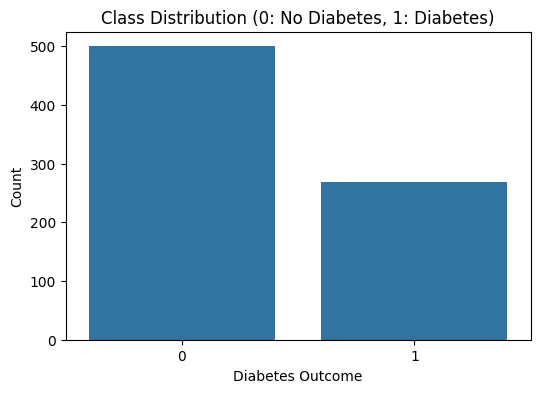

In [128]:
#information after EDA
print("First 5 rows of the dataset:")
print(df_copy.head())


print("\nDataset Description:")
print(df_copy.describe())


zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print("\nNumber of zero entries in critical columns:")
print((df_copy[zero_features] == 0).sum())


plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Outcome')
plt.title("Class Distribution (0: No Diabetes, 1: Diabetes)")
plt.xlabel("Diabetes Outcome")
plt.ylabel("Count")
plt.show()

In [91]:
# 4. تجهيز البيانات
X = df_copy.drop('Outcome', axis=1)
y = df_copy['Outcome']

# 5. موازنة البيانات (SMOTE)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [92]:
# 6. تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, stratify=y_res, random_state=42)

# 7. مقياس البيانات
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [93]:
# 8. بناء النموذج
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

/Users/dejak/data-visualization/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [94]:

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

In [95]:
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 9. التدريب
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[es],
    verbose=1
)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4476 - loss: 0.9065 - precision_3: 0.4341 - recall_3: 0.4943 - val_accuracy: 0.5562 - val_loss: 0.6895 - val_precision_3: 0.5714 - val_recall_3: 0.5783
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5331 - loss: 0.7965 - precision_3: 0.5243 - recall_3: 0.5190 - val_accuracy: 0.6625 - val_loss: 0.6566 - val_precision_3: 0.6883 - val_recall_3: 0.6386
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6572 - loss: 0.6486 - precision_3: 0.6472 - recall_3: 0.6818 - val_accuracy: 0.7063 - val_loss: 0.6308 - val_precision_3: 0.7368 - val_recall_3: 0.6747
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6622 - loss: 0.6266 - precision_3: 0.6345 - recall_3: 0.6987 - val_accuracy: 0.7250 - val_loss: 0.6081 - val_precision_3: 0.7746 - val_recall_3: 0.6627
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6665 - loss: 0.6325 - precision_3: 0.6574 - recall_3: 0.6591 - val_

In [96]:
# 10. التقييم الرقمي
results = model.evaluate(X_test, y_test)
print(f"Test Loss: {results[0]:.4f}")
print(f"Test Accuracy: {results[1]:.4f}")
print(f"Test Precision: {results[2]:.4f}")
print(f"Test Recall: {results[3]:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7957 - loss: 0.4824 - precision_3: 0.7371 - recall_3: 0.9242  
Test Loss: 0.4580
Test Accuracy: 0.8150
Test Precision: 0.7647
Test Recall: 0.9100


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


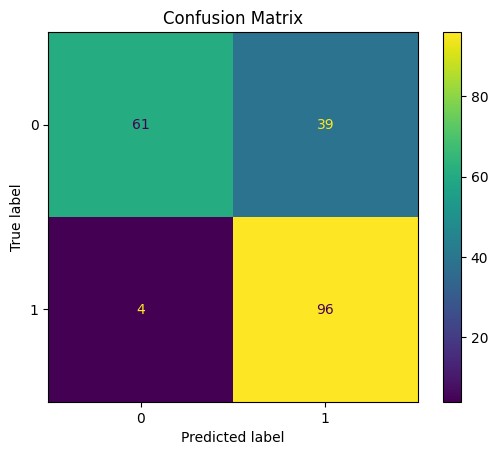

In [118]:
# 11. مصفوفة الالتباس
y_pred = (model.predict(X_test) > 0.3157).astype("int32")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()


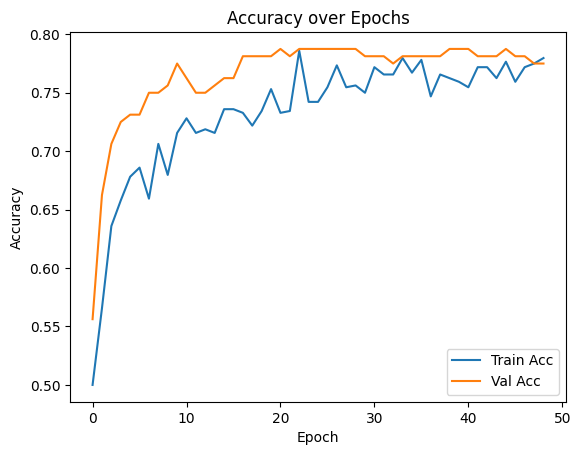

In [119]:
# 12. رسم منحنيات الدقة (Accuracy) والـ Loss
plt.figure()
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

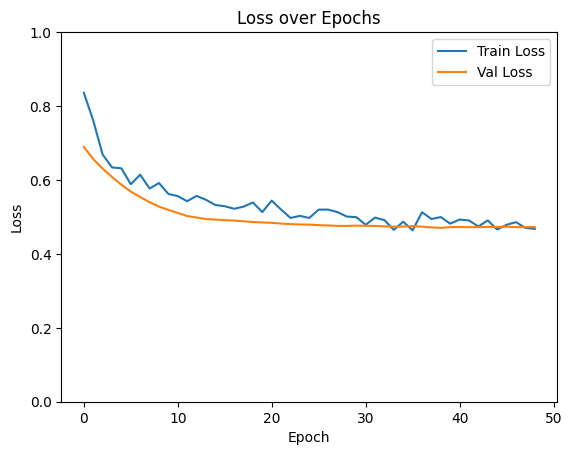

In [120]:
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0,1])
plt.legend()
plt.title('Loss over Epochs')
plt.show()

In [122]:
import joblib

model.save('model_diabetes_2.h5')


/Users/dejak/data-visualization/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6055 - loss: 0.7169 - val_accuracy: 0.7063 - val_loss: 0.6405
Epoch 2/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6973 - loss: 0.6275 - val_accuracy: 0.7312 - val_loss: 0.5921
Epoch 3/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6943 - loss: 0.5964 - val_accuracy: 0.7312 - val_loss: 0.5763
Epoch 4/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7311 - loss: 0.5635 - val_accuracy: 0.7250 - val_loss: 0.5717
Epoch 5/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7589 - loss: 0.5183 - val_accuracy: 0.7188 - val_loss: 0.5674
Epoch 6/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7679 - loss: 0.5285 - val_accuracy: 0.7125 - val_loss: 0.5630
Epoch 7/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7586 - loss: 0.5299 - val_accuracy: 0.7063 - val_loss: 0.5630
Epoch 8/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7894 - loss: 0.4845 - val_accuracy: 0.7250 - val_loss:

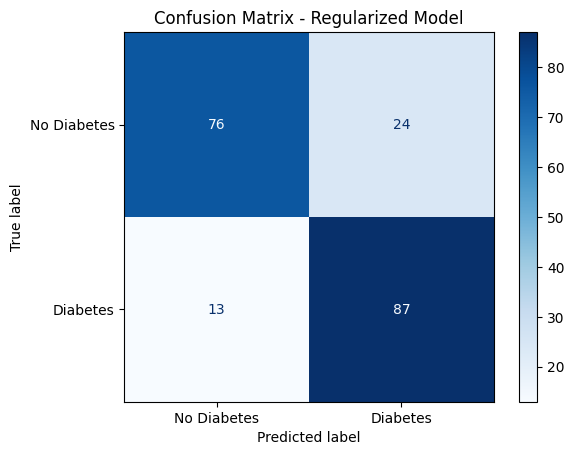

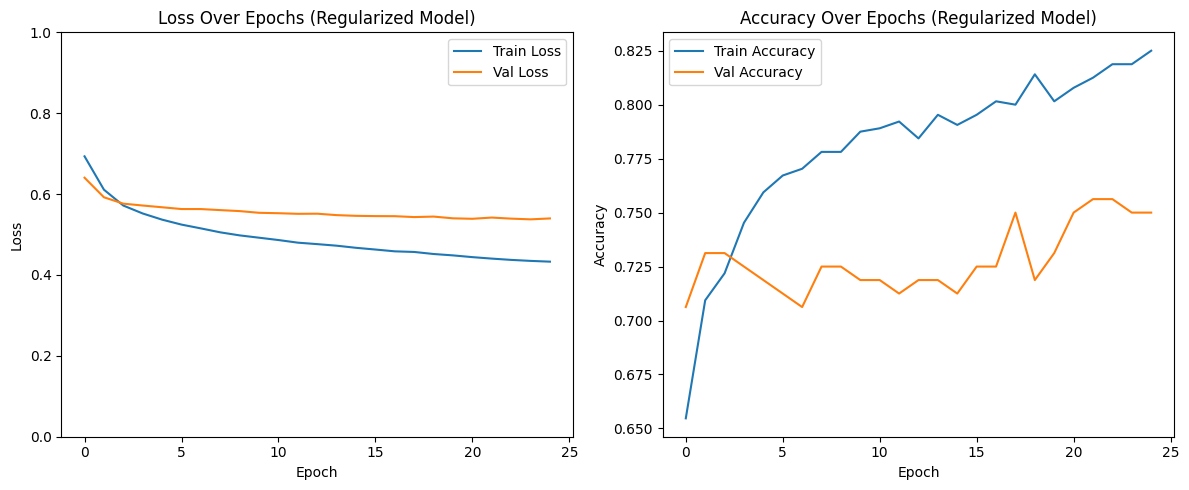

In [133]:
#Option Trying Regulization 

from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

model_reg = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train.shape[1],)),

    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),

 
    Dense(1, activation='sigmoid')
])

model_reg.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model_reg.summary()


history_reg = model_reg.fit(
    X_train,
    y_train,
    epochs=25,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


y_pred_probs_reg = model_reg.predict(X_test)
y_pred_reg = (y_pred_probs_reg > 0.5).astype("int32")

acc_reg = accuracy_score(y_test, y_pred_reg)
prec_reg = precision_score(y_test, y_pred_reg)
rec_reg = recall_score(y_test, y_pred_reg)

print(f"Regularized Model Accuracy:  {acc_reg:.4f}")
print(f"Regularized Model Precision: {prec_reg:.4f}")
print(f"Regularized Model Recall:    {rec_reg:.4f}")


cm_reg = confusion_matrix(y_test, y_pred_reg)
disp_reg = ConfusionMatrixDisplay(confusion_matrix=cm_reg, display_labels=["No Diabetes", "Diabetes"])
disp_reg.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Regularized Model")
plt.show()


plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(history_reg.history['loss'], label='Train Loss')
plt.plot(history_reg.history['val_loss'], label='Val Loss')
plt.ylim(0, 1)
plt.title('Loss Over Epochs (Regularized Model)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history_reg.history['accuracy'], label='Train Accuracy')
plt.plot(history_reg.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs (Regularized Model)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
